### 0.1 Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
df_subscribers = pd.read_pickle('subscribers')
df_engagement = pd.read_pickle('engagement')
df_subscribers_raw = df_subscribers.copy()
df_rep = pd.read_pickle('customer_service_reps')

In [3]:
df_channel = pd.read_excel('advertising_spend_data.xlsx')

### 1.1 Channel of Ads

In [4]:
print(df_channel.shape)
df_channel.head(5)

(10, 9)


,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300


### 1.2 df_subscribers

In [5]:
print(df_subscribers.shape)
df_subscribers.head()

(227628, 29)


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [6]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

### 1.3 df_engagement

In [7]:
df_engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [78]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [8]:
df_eng_mean = df_engagement.groupby('subid').mean().reset_index()
df_eng_mean.head(10)

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
0,20000062,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000,0.000000
1,20000405,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000,0.000000
2,20000604,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667,0.133333
3,20000685,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526,0.657895
4,20000741,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000,0.000000
5,20000796,4.826087,0.826087,4.217391,4.413043,0.065217,0.913043,0.673913
6,20000809,1.750000,0.500000,0.500000,2.750000,0.000000,0.250000,2.400000
7,20000863,1.125000,0.625000,0.750000,4.250000,0.000000,0.000000,0.000000
8,20000963,0.666667,0.250000,2.666667,3.500000,0.000000,0.333333,0.000000
9,20000992,1.000000,0.500000,2.750000,5.250000,0.000000,0.750000,0.000000


### 1.4 customer_service_reps

In [81]:
df_rep.shape

(2208643, 13)

In [80]:
df_rep.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


### 2.1 Checking Nulls

In [9]:
df_subscribers['intended_use'].fillna('not_specified', inplace=True)
df_subscribers['package_type'].fillna('not_specified', inplace=True)
df_subscribers['preferred_genre'].fillna('not_specified', inplace=True)
df_subscribers['attribution_survey'].fillna('not_specified', inplace=True)
df_subscribers['op_sys'].fillna('not_specified', inplace=True)
df_subscribers['payment_type'].fillna('not_specified', inplace=True)
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  227628 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               227628 non-null  object        
 4   intended_use                  227628 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [10]:
df_subscribers.num_weekly_services_utilized.fillna(0, inplace=True)
df_subscribers.num_ideal_streaming_services .fillna(0, inplace=True)
df_subscribers.creation_until_cancel_days.fillna(0, inplace=True)
df_subscribers.age.fillna(0, inplace=True)
df_subscribers.revenue_net.fillna(0, inplace=True)
df_subscribers['weekly_consumption_hour'].fillna(0, inplace=True) #assume no consumption
df_subscribers['join_fee'].fillna(0, inplace=True) #assume no join fee
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  227628 non-null  object        
 2   num_weekly_services_utilized  227628 non-null  float64       
 3   preferred_genre               227628 non-null  object        
 4   intended_use                  227628 non-null  object        
 5   weekly_consumption_hour       227628 non-null  float64       
 6   num_ideal_streaming_services  227628 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           227628 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [11]:
df_subscribers = df_subscribers[(df_subscribers.weekly_consumption_hour >= 0)&(df_subscribers.weekly_consumption_hour <= 50)]
df_subscribers = df_subscribers[(df_subscribers.age < 100) & (df_subscribers.age >= 0) | (df_subscribers.age == -999)]
df_subscribers = df_subscribers[(df_subscribers.num_ideal_streaming_services) >= 0]
df_subscribers = df_subscribers[(df_subscribers.join_fee >= 0)]
df_subscribers = df_subscribers[(df_subscribers.creation_until_cancel_days >= 0) | (df_subscribers.creation_until_cancel_days == -999)]
df_subscribers = df_subscribers[(df_subscribers.num_weekly_services_utilized >= 0) & (df_subscribers.num_weekly_services_utilized <= 5)]
#setting reasonable values

In [12]:
print(df_subscribers.shape)
print(df_subscribers.describe())

(223942, 29)
              subid  num_weekly_services_utilized  weekly_consumption_hour  \
count  2.239420e+05                 223942.000000            223942.000000   
mean   2.498721e+07                      1.497786                23.190369   
std    2.885966e+06                      1.539032                11.345688   
min    2.000001e+07                      0.000000                 0.000000   
25%    2.248967e+07                      0.000000                22.951579   
50%    2.497224e+07                      2.110991                25.851492   
75%    2.749200e+07                      2.759033                30.201361   
max    2.999998e+07                      4.999189                49.050793   

       num_ideal_streaming_services            age  months_per_bill_period  \
count                 223942.000000  223942.000000                223942.0   
mean                       0.995200      38.947376                     4.0   
std                        1.003122      21.165180

In [13]:
df_subscribers.account_creation_date = df_subscribers.account_creation_date.apply(lambda x:pd.to_datetime(x))

### 2.2 Checking Categorical Variables

In [14]:
print('gender','\n',df_subscribers.male_TF.value_counts(),'\n')
print('op_sys','\n',df_subscribers.op_sys.value_counts(),'\n')
print('language','\n',df_subscribers.language.value_counts(),'\n')
print('country','\n',df_subscribers.country.value_counts(),'\n')
print('intended_use\n',df_subscribers.intended_use.value_counts(),'\n')
print('package_type\n',df_subscribers.package_type.value_counts(),'\n')
print('preferred_genre\n',df_subscribers.preferred_genre.value_counts(),'\n')
print('num_ideal_streaming_services\n',df_subscribers.num_ideal_streaming_services.value_counts(),'\n')

gender 
 False    198401
True      25272
Name: male_TF, dtype: int64 

op_sys 
 iOS              142063
Android           68708
not_specified     13171
Name: op_sys, dtype: int64 

language 
 ar    223942
Name: language, dtype: int64 

country 
 UAE    223942
Name: country, dtype: int64 

intended_use
 access to exclusive content    87529
replace OTT                    68265
supplement OTT                 26180
expand regional access         13705
expand international access    12775
other                           6973
education                       5042
not_specified                   3473
Name: intended_use, dtype: int64 

package_type
 base             109806
enhanced          62307
not_specified     34869
economy           16960
Name: package_type, dtype: int64 

preferred_genre
 comedy           123857
drama             45774
not_specified     35611
regional           8893
international      6030
other              3777
Name: preferred_genre, dtype: int64 

num_ideal_streaming_s

In [15]:
# age_range
df_subscribers['age_range'] = df_subscribers.age.apply(lambda x:'unknown' if x == 0 else('<18' if x < 18 else('18-24' if x < 25 else ( '25-34' if x < 35 else ('35-44' if x < 45 else('45-54' if x < 55 else ('55-64' if x < 65 else '>65')))))))
df_subscribers.age_range.value_counts()

45-54      44953
35-44      42709
55-64      36320
unknown    35232
25-34      33556
>65        20444
18-24      10724
<18            4
Name: age_range, dtype: int64

### 2.3 Representatives

In [16]:
print(df_rep.info())
print(df_rep.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB
None
       customer_service_rep_id         subid  num_trial_days  \
count             2.208643e+06  2.208643e+06    2.2

In [17]:
df_rep.subid.value_counts()
#duplicated subid

20890160    13
26463599    13
23509022    13
26854692    12
20272343    11
            ..
27960049     1
26073187     1
22152433     1
29845367     1
22439286     1
Name: subid, Length: 1369360, dtype: int64

### 3.1 cleaning df_rep and df_sus

In [18]:
from sklearn import model_selection
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import math
import copy

In [19]:
rep_churn = df_rep.groupby('subid', as_index=False).max(['renew','next_payment','last_payment','billing_channel','account_creation_date','cancel_date'])
# take unique users or might cause Multicollinearity problem
rep_churn

,subid,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,20000002,33248063,False,14,False,0.0000,0
1,20000003,38546792,False,14,False,0.0000,0
2,20000007,36528680,False,14,False,0.0000,0
3,20000014,36829291,False,14,False,0.0000,0
4,20000031,33936144,False,14,False,0.0000,0
...,...,...,...,...,...,...,...
1369355,29999986,36700778,False,14,True,2.4589,2
1369356,29999991,38623252,False,14,True,0.0000,1
1369357,29999993,37600163,False,14,False,0.0000,0
1369358,29999997,31943974,False,14,False,0.0000,0


In [20]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223942 entries, 162502 to 598241
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         223942 non-null  int64         
 1   package_type                  223942 non-null  object        
 2   num_weekly_services_utilized  223942 non-null  float64       
 3   preferred_genre               223942 non-null  object        
 4   intended_use                  223942 non-null  object        
 5   weekly_consumption_hour       223942 non-null  float64       
 6   num_ideal_streaming_services  223942 non-null  float64       
 7   retarget_TF                   223942 non-null  bool          
 8   age                           223942 non-null  float64       
 9   male_TF                       223673 non-null  object        
 10  country                       223942 non-null  object        
 11  attribut

In [21]:
df_subscribers.monthly_price.value_counts()

4.7343    223427
5.1013       323
1.0643       157
4.4407        18
4.3673        12
4.0003         2
1.1744         1
0.8074         1
4.6976         1
Name: monthly_price, dtype: int64

In [22]:
df_subscribers.discount_price.value_counts()

4.5141    223422
5.0279       323
1.0276       157
4.2205        18
4.0737        12
4.3673         4
3.7801         2
4.4407         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [23]:
df_subscribers_churn= pd.merge(df_subscribers, rep_churn, on=['subid'])
df_subscribers_churn.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,paid_TF,refund_after_trial_TF,payment_type,age_range,customer_service_rep_id,current_sub_TF,num_trial_days,trial_completed_TF,revenue_net_1month,payment_period
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,False,not_specified,25-34,34279646,False,14,False,0.0000,0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,True,False,Standard Charter,55-64,37297757,True,14,True,4.5875,1
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,True,False,RAKBANK,18-24,37641402,True,14,True,3.4498,1
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,73.0,False,...,False,False,not_specified,>65,34131106,False,14,False,0.0000,0
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,24.0,True,...,False,False,not_specified,18-24,39321800,False,14,False,0.0000,0


In [24]:
df_subscribers_churn = df_subscribers_churn[['subid','package_type','num_weekly_services_utilized','preferred_genre','intended_use','weekly_consumption_hour','num_ideal_streaming_services','retarget_TF','male_TF','op_sys','join_fee','paid_TF','age_range','payment_period','current_sub_TF']]
df_subscribers_churn.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,male_TF,op_sys,join_fee,paid_TF,age_range,payment_period,current_sub_TF
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,True,iOS,0.1101,False,25-34,0,False
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,False,Android,0.3303,True,55-64,1,True
2,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,False,iOS,0.0000,True,18-24,1,True
3,24930568,base,0.000000,comedy,access to exclusive content,25.851492,0.000000,False,False,iOS,0.6606,False,>65,0,False
4,21361112,enhanced,0.000000,comedy,access to exclusive content,37.451142,0.000000,False,True,iOS,0.3303,False,18-24,0,False


In [25]:
df_subscribers_churn.current_sub_TF.value_counts()

False    100919
True      31855
Name: current_sub_TF, dtype: int64

In [26]:
df_subscribers_churn.current_sub_TF = df_subscribers_churn.current_sub_TF.astype(int)

f1 = (df_subscribers_churn.current_sub_TF==0)
f2 = (df_subscribers_churn.current_sub_TF==1)
df_subscribers_churn.loc[f1, 'churn_TF']= 1
df_subscribers_churn.loc[f2, 'churn_TF']= 0

df_subscribers_churn.churn_TF.value_counts()

1.0    100919
0.0     31855
Name: churn_TF, dtype: int64

### 3.2 Merging df_engagement

In [27]:
df_subscribers_churn = pd.merge(df_subscribers_churn, df_eng_mean, on=['subid'])
print(df_subscribers_churn.head())
del df_subscribers_churn['subid']

      subid package_type  num_weekly_services_utilized preferred_genre  \
0  26844789     enhanced                      3.362885        regional   
1  29726122         base                      2.049135          comedy   
2  20299962         base                      3.002048           drama   
3  24930568         base                      0.000000          comedy   
4  21361112     enhanced                      0.000000          comedy   

                  intended_use  weekly_consumption_hour  \
0                  replace OTT                36.001186   
1  access to exclusive content                20.051667   
2  access to exclusive content                34.551230   
3  access to exclusive content                25.851492   
4  access to exclusive content                37.451142   

   num_ideal_streaming_services  retarget_TF male_TF   op_sys  ...  \
0                      1.951776        False    True      iOS  ...   
1                      1.860289        False   False  Androi

### 3.3 Adding Dummies

In [28]:
df_subscribers_churn_dummy = df_subscribers_churn.join(pd.get_dummies(df_subscribers_churn[['package_type','preferred_genre','intended_use','op_sys','age_range']]))
df_subscribers_churn_dummy = df_subscribers_churn_dummy.drop(['package_type','preferred_genre','intended_use','op_sys','paid_TF','age_range'], axis = 1)
df_subscribers_churn_dummy['retarget_TF'] = df_subscribers_churn_dummy['retarget_TF'].astype(bool).astype(int)
df_subscribers_churn_dummy['male_TF'] = df_subscribers_churn_dummy['male_TF'].astype(bool).astype(int)

In [29]:
df_subscribers_churn_dummy = df_subscribers_churn_dummy.apply(pd.to_numeric, errors='ignore')

In [30]:
print(df_subscribers_churn_dummy['male_TF'].value_counts())
print(df_subscribers_churn_dummy['retarget_TF'].value_counts())

0    119238
1     13506
Name: male_TF, dtype: int64
0    128345
1      4399
Name: retarget_TF, dtype: int64


### 3.4 Dealing with Correlations

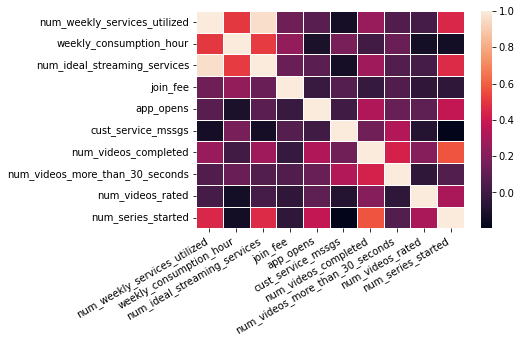

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_subscribers_churn_dummy[['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','join_fee','app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']].corr()


sns.heatmap(corr, linewidths=1,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.xticks(rotation=30, horizontalalignment='right')
plt.savefig('corr')

In [32]:
del df_subscribers_churn_dummy['num_ideal_streaming_services'] #problem of correlation and multicolinearity

### 3.5 Model Building

In [93]:
df_train, df_test = model_selection.train_test_split(df_subscribers_churn_dummy, test_size=0.2)

df_train_y = df_train.churn_TF
df_train_x = df_train.copy()
del df_train_x['churn_TF']
del df_train_x['current_sub_TF']

df_test_y = df_test.churn_TF
df_test_x = df_test.copy()
del df_test_x['churn_TF']
del df_test_x['current_sub_TF']

#### 3.5.1 Linear Model

In [34]:
lpm_model = sm.OLS(endog=df_train_y, exog=df_train_x)
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3189.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:46:27   Log-Likelihood:                -21510.
No. Observations:              106195   AIC:                         4.309e+04
Df Residuals:                  106158   BIC:                         4.345e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [35]:
#del all var that is not sig
df_train_x_1 = df_train_x.copy()
df_test_x_1 = df_test_x.copy()

del df_train_x_1['app_opens']
del df_train_x_1['retarget_TF']
del df_train_x_1['num_videos_more_than_30_seconds']
del df_train_x_1['age_range_unknown']

del df_test_x_1['app_opens']
del df_test_x_1['retarget_TF']
del df_test_x_1['num_videos_more_than_30_seconds']
del df_test_x_1['age_range_unknown']

In [36]:
lpm_model = sm.OLS(endog=df_train_y, exog=df_train_x_1)
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     3479.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:46:28   Log-Likelihood:                -21514.
No. Observations:              106195   AIC:                         4.310e+04
Df Residuals:                  106161   BIC:                         4.342e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

#### 3.5.2 Logistic Model

In [37]:
logit_model = sm.Logit(endog=df_train_y, exog=df_train_x)
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

         Current function value: 0.222802
         Iterations: 35

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:               106195
Model:                          Logit   Df Residuals:                   106158
Method:                           MLE   Df Model:                           36
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.5963
Time:                        09:46:33   Log-Likelihood:                -23660.
converged:                      False   LL-Null:                       -58604.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num_weekly_services_utilized                -0.0700

/Users/jiajun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 3.6 Performance

In [38]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact


def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 10)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

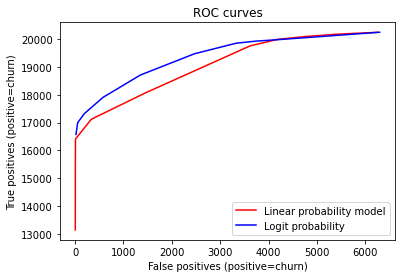

In [40]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test_x_1)
df_test['prob_churn_logit'] = logit_results.predict(df_test_x)

###fig = plt.figure()
###ax = plt.gca()
###ax.plot(df_test[['prob_churn_lpm']],df_test_y, 'k.')
###ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
###plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
###plt.xlim(ax.get_ylim())
###plt.title('LPM vs logit predictions')
###plt.xlabel('Linear Probability Model Prediction')
###plt.ylabel('Logit Model Prediction')
###plt.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])
###plt.savefig('compare lpm and logit predictions.png')
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test_y, df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test_y, df_test['prob_churn_lpm'])


ROC_df = pd.DataFrame()
ROC_df['lpm_false_positives'] = lpm_false_positives
ROC_df['lpm_true_positives'] = lpm_true_positives
ROC_df['logit_false_positives'] = logit_false_positives
ROC_df['logit_true_positives'] = logit_true_positives
ROC_df.to_csv('ROC_df.csv')


# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'r-')
ax1.plot(logit_false_positives, logit_true_positives, 'b-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('ROC.png')


### 3.7 Changing prices

In [41]:
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.1
threshold = 0.5
base_price = 4.73
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [42]:
df_test['random_draws'] = np.random.random(df_test.shape[0])
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)


In [43]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)
    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind


# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount = t_acceptance_rate_churn
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    t_acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind


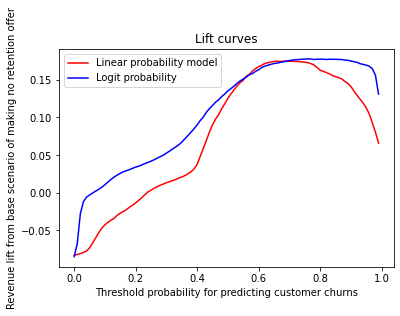

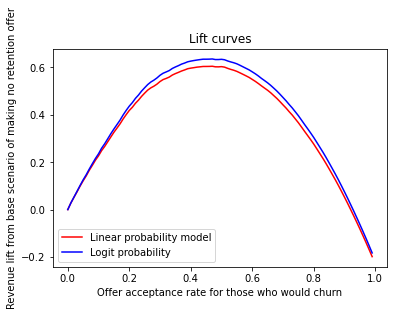

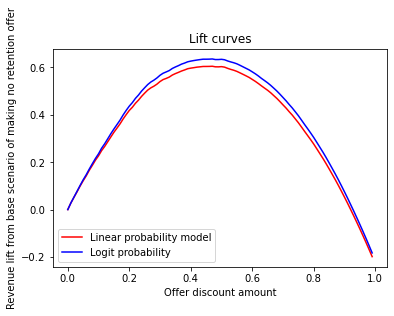

In [44]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'r-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Threshold sensitivity.png')

# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'r-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Acceptance rate sensitivity.png')

# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'r-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'b-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])
plt.savefig('Discount amount sensitivity.png')


### 4.1 AB test

In [45]:
df_merge_A = pd.merge(df_engagement,df_subscribers)
df_merge = pd.merge(df_merge_A,df_rep)
df_merge.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period',
       'package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type', 'age_range',
       'customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'num_trial_days', 'trial_completed_TF', 'billing_channel',
       'revenue_net_1month', 'last_payment', 'next_payment'

In [46]:
df_merge.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,package_type,...,customer_service_rep_id,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,last_payment,next_payment,renew
0,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,not_specified,...,32881490,False,2019-07-03 02:11:33,14,False,OTT,0.0,2019-07-01 06:59:20,NaT,False
1,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0,not_specified,...,32881490,False,2019-07-03 02:11:33,14,False,OTT,0.0,2019-07-01 06:59:20,NaT,False
2,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,not_specified,...,32881490,False,2019-07-03 02:11:33,14,False,OTT,0.0,2019-07-01 06:59:20,NaT,False
3,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0,not_specified,...,36472213,False,2019-07-15 01:38:19,14,False,OTT,0.0,2019-07-02 15:46:21,NaT,False
4,20848497,2019-07-03,1.0,1.0,6.0,6.0,0.0,1.0,0.0,not_specified,...,36472213,False,2019-07-15 01:38:19,14,False,OTT,0.0,2019-07-02 15:46:21,NaT,False


In [47]:
print(df_merge.dtypes)

subid                                       int64
date                               datetime64[ns]
app_opens                                 float64
cust_service_mssgs                        float64
num_videos_completed                      float64
num_videos_more_than_30_seconds           float64
num_videos_rated                          float64
num_series_started                        float64
payment_period                            float64
package_type                               object
num_weekly_services_utilized              float64
preferred_genre                            object
intended_use                               object
weekly_consumption_hour                   float64
num_ideal_streaming_services              float64
retarget_TF                                  bool
age                                       float64
male_TF                                    object
country                                    object
attribution_technical                      object


In [48]:
df_merge.groupby(['revenue_net','plan_type']).first()

,,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,package_type,...,customer_service_rep_id,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,last_payment,next_payment,renew
revenue_net,plan_type,,,,,,,,,,,,,,,,,,,,,
-5.9821,base_uae_14_day_trial,28829250,2019-12-01,1.0,1.0,2.0,7.0,0.0,0.0,0.0,base,...,38010004,True,NaT,14,True,OTT,-5.2848,2019-12-01 13:37:09,2020-04-16 14:30:13,True
-5.7252,base_uae_14_day_trial,25850614,2020-03-24,1.0,1.0,2.0,7.0,0.0,0.0,0.0,enhanced,...,34219974,True,2020-04-13 18:24:41,14,True,OTT,5.0279,2020-03-25 06:58:59,2020-04-08 15:52:52,True
-5.6885,base_uae_14_day_trial,27849538,2019-09-29,1.0,1.0,2.0,7.0,0.0,1.0,0.0,base,...,31537832,False,2019-11-25 18:50:06,14,True,OTT,-0.6973,2019-09-29 05:54:10,2019-10-13 13:33:52,True
-5.6518,base_uae_14_day_trial,29595034,2020-02-25,1.0,1.0,2.0,7.0,0.0,0.0,0.0,base,...,38870794,False,2020-03-28 17:57:07,14,True,OTT,4.9545,2020-02-25 15:42:00,2020-03-11 13:59:39,True
-5.6151,base_uae_14_day_trial,29653724,2019-08-21,1.0,1.0,2.0,7.0,0.0,0.0,0.0,base,...,31906529,False,NaT,14,True,OTT,4.9178,2019-08-21 16:34:13,2019-09-05 10:45:45,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15.4140,base_uae_14_day_trial,24614409,2019-06-30,1.0,1.0,5.0,7.0,0.0,0.0,0.0,not_specified,...,37027495,True,NaT,14,True,OTT,5.1380,2019-06-30 21:55:58,2019-07-15 18:41:44,True
15.4507,base_uae_14_day_trial,23840081,2019-07-10,1.0,1.0,2.0,7.0,0.0,0.0,0.0,not_specified,...,35008125,True,NaT,14,True,OTT,5.1380,2019-07-11 10:03:06,2019-07-25 18:37:57,True
15.5241,base_uae_14_day_trial,24382180,2019-06-30,1.0,1.0,7.0,7.0,0.0,1.0,0.0,not_specified,...,30772462,True,NaT,14,True,OTT,5.1747,2019-06-30 21:55:57,2019-07-15 18:41:45,True


In [49]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

df_merge.groupby('plan_type').first()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,package_type,...,customer_service_rep_id,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,last_payment,next_payment,renew
plan_type,,,,,,,,,,,,,,,,,,,,,
base_eur_14_day_trial,24538946,2019-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_specified,...,34246054,True,2019-10-15 08:06:59,14,True,OTT,4.4040,2019-07-01 17:06:18,2019-07-16 10:06:47,True
base_uae_14_day_trial,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0,not_specified,...,32881490,False,2019-07-03 02:11:33,14,False,OTT,0.0000,2019-07-01 06:59:20,2019-07-17 11:05:36,False
base_uae_no_trial_7_day_guarantee,26987319,2020-03-14,1.0,2.0,6.0,6.0,0.0,1.0,1.0,not_specified,...,31591685,True,NaT,0,True,OTT,4.5875,2020-03-14 07:05:25,2020-03-14 07:05:25,False
high_aud_14_day_trial,24784137,2019-07-12,1.0,1.0,7.0,7.0,0.0,0.0,0.0,enhanced,...,37620313,True,2019-09-28 19:18:04,14,True,OTT,3.9636,2019-07-11 23:35:16,2019-07-26 14:33:10,True
high_jpy_14_day_trial,22118520,2020-01-26,2.0,12.0,1.0,3.0,0.0,0.0,0.0,not_specified,...,39199405,False,2020-02-11 04:11:17,14,True,OTT,0.0367,2020-01-26 06:22:14,2020-02-09 13:57:04,True
high_sar_14_day_trial,21122558,2019-07-10,1.0,1.0,7.0,7.0,0.0,0.0,0.0,not_specified,...,33868321,False,2019-09-02 14:47:17,14,True,OTT,2.3121,2019-07-10 15:18:00,2019-07-25 14:34:30,True
high_uae_14_day_trial,24181677,2019-11-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,enhanced,...,36940646,True,2020-03-21 17:46:10,14,True,OTT,4.9545,2019-11-06 05:49:52,2019-11-20 13:51:10,True
low_gbp_14_day_trial,24078393,2019-10-26,2.0,2.0,7.0,7.0,0.0,1.0,0.0,enhanced,...,32398862,False,2019-10-30 15:22:40,14,False,OTT,0.0000,2019-10-26 09:31:39,NaT,False
low_uae_no_trial,27542549,2019-07-28,0.0,2.0,6.0,6.0,2.0,1.0,1.0,not_specified,...,38516836,False,2019-12-10 10:20:22,0,True,OTT,1.0276,2019-07-29 14:36:03,2019-11-26 13:39:52,True


In [50]:
df_NaN = df_merge[df_merge.isna().any(axis=1)]
print(df_NaN.columns)
df_merge["revenue_net"].dropna()

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period',
       'package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type', 'age_range',
       'customer_service_rep_id', 'current_sub_TF', 'cancel_date',
       'num_trial_days', 'trial_completed_TF', 'billing_channel',
       'revenue_net_1month', 'last_payment', 'next_payment'

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2541071    0.0
2541072    0.0
2541073    0.0
2541074    0.0
2541075    0.0
Name: revenue_net, Length: 2541076, dtype: float64

In [51]:
df_merge.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,num_weekly_services_utilized,weekly_consumption_hour,...,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee,customer_service_rep_id,num_trial_days,revenue_net_1month
count,2.541076e+06,2.507408e+06,2.507408e+06,2.507408e+06,2.507408e+06,2.507408e+06,2.507408e+06,2.541076e+06,2.541076e+06,2.541076e+06,...,2.541076e+06,2541076.0,2.541076e+06,2.541076e+06,2.541076e+06,2.541076e+06,2.541076e+06,2.541076e+06,2.541076e+06,2.541076e+06
mean,2.499047e+07,2.250801e+00,3.893184e-01,2.795817e+00,4.393579e+00,5.899758e-02,6.865468e-01,6.748775e-01,1.858050e+00,1.878577e+01,...,3.216152e+01,4.0,4.733774e+00,4.513856e+00,1.286179e+01,3.278387e+00,6.930522e-02,3.506159e+07,1.399599e+01,3.522213e+00
std,2.891302e+06,2.429495e+00,8.054356e-01,2.211868e+00,1.453331e+00,2.804246e-01,4.641359e-01,7.082201e-01,1.502746e+00,1.379868e+01,...,2.466335e+01,0.0,6.366890e-02,6.244258e-02,4.208351e+01,4.120448e+00,1.481054e-01,2.817055e+06,2.369315e-01,1.856829e+00
min,2.000006e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.0,1.064300e+00,1.027600e+00,0.000000e+00,-5.982100e+00,0.000000e+00,3.000466e+07,0.000000e+00,-5.578400e+00
25%,2.247863e+07,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.0,4.734300e+00,4.514100e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.276891e+07,1.400000e+01,3.229600e+00
50%,2.498367e+07,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.464467e+00,2.440154e+01,...,3.800000e+01,4.0,4.734300e+00,4.514100e+00,0.000000e+00,0.000000e+00,3.670000e-02,3.500545e+07,1.400000e+01,4.587500e+00
75%,2.750330e+07,3.000000e+00,1.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.891587e+00,2.875140e+01,...,5.300000e+01,4.0,4.734300e+00,4.514100e+00,2.000000e+00,4.881100e+00,3.670000e-02,3.743911e+07,1.400000e+01,4.587500e+00
max,2.999994e+07,1.380000e+02,3.900000e+01,2.400000e+01,3.200000e+01,1.200000e+01,9.000000e+00,3.000000e+00,4.999189e+00,4.905079e+01,...,9.900000e+01,4.0,5.101300e+00,5.027900e+00,3.120000e+02,1.563420e+01,7.340000e-01,3.999743e+07,1.400000e+01,5.468300e+00


In [52]:
df_merge.groupby('plan_type').count()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,package_type,...,customer_service_rep_id,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,last_payment,next_payment,renew
plan_type,,,,,,,,,,,,,,,,,,,,,
base_eur_14_day_trial,409,409,355,355,355,355,355,355,409,409,...,409,409,18,409,409,409,409,409,250,409
base_uae_14_day_trial,2535534,2535534,2502001,2502001,2502001,2502001,2502001,2502001,2535534,2535534,...,2535534,2535534,629091,2535534,2535534,2535534,2535534,2535534,1052291,2535534
base_uae_no_trial_7_day_guarantee,10,10,10,10,10,10,10,10,10,10,...,10,10,0,10,10,10,10,10,10,10
high_aud_14_day_trial,10,10,10,10,10,10,10,10,10,10,...,10,10,4,10,10,10,10,10,6,10
high_jpy_14_day_trial,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
high_sar_14_day_trial,249,249,249,249,249,249,249,249,249,249,...,249,249,51,249,249,249,249,249,91,249
high_uae_14_day_trial,4133,4133,4133,4133,4133,4133,4133,4133,4133,4133,...,4133,4133,1471,4133,4133,4133,4133,4133,1684,4133
low_gbp_14_day_trial,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,0,5
low_uae_no_trial,718,718,637,637,637,637,637,637,718,718,...,718,718,26,718,718,718,718,718,444,718


In [53]:
import scipy.stats as stats
n_control = df_merge[df_merge['plan_type']=='base_uae_14_day_trial']['subid'].count()
print(n_control)

2535534


In [54]:
control_sus_res = df_merge[(df_merge['renew'] == True) &(df_merge['plan_type']=='base_uae_14_day_trial')]['renew']
control_sus_res

13         True
14         True
15         True
16         True
17         True
           ... 
2541032    True
2541033    True
2541034    True
2541035    True
2541036    True
Name: renew, Length: 1052291, dtype: object

In [55]:
treatment_plan_type = ['base_eur_14_day_trial','base_uae_no_trial_7_day_guarantee','high_aud_14_day_trial','high_jpy_14_day_trial',
                      'high_sar_14_day_trial','high_uae_14_day_trial','low_gbp_14_day_trial','low_uae_no_trial']
treatment_dict_sus = {}
for p in treatment_plan_type:
    treatment_dict_sus[p] = df_merge[(df_merge['renew'] == True) &(df_merge['plan_type'] == p)]['renew']
    print(p)

base_eur_14_day_trial
base_uae_no_trial_7_day_guarantee
high_aud_14_day_trial
high_jpy_14_day_trial
high_sar_14_day_trial
high_uae_14_day_trial
low_gbp_14_day_trial
low_uae_no_trial


In [56]:
treatment_dict_len = {}
for p in treatment_plan_type:
    treatment_dict_len[p] = [df_merge[df_merge['plan_type']==p]['subid'].count(),
                             df_merge[(df_merge['renew'] == True) &(df_merge['plan_type'] == p)]['renew'].count()]
print(treatment_dict_len)

{'base_eur_14_day_trial': [409, 250], 'base_uae_no_trial_7_day_guarantee': [10, 0], 'high_aud_14_day_trial': [10, 6], 'high_jpy_14_day_trial': [8, 8], 'high_sar_14_day_trial': [249, 91], 'high_uae_14_day_trial': [4133, 1684], 'low_gbp_14_day_trial': [5, 0], 'low_uae_no_trial': [718, 444]}


In [57]:
from statsmodels.stats.proportion import proportions_ztest
z_socre_dict = {}
for p in treatment_plan_type:
    nobs = [n_control, treatment_dict_len[p][0]]
    suc = [control_sus_res.count(),treatment_dict_len[p][1]]
    z_stat, pval = proportions_ztest(suc, nobs=nobs)
    z_socre_dict[p] = [z_stat, pval]
print(z_socre_dict)

{'base_eur_14_day_trial': [-8.053438248157011, 8.050002249421384e-16], 'base_uae_no_trial_7_day_guarantee': [2.6635519194092425, 0.007732047896401613], 'high_aud_14_day_trial': [-1.1872030871800754, 0.23514752346285994], 'high_jpy_14_day_trial': [-3.3580120751084013, 0.0007850518361608018], 'high_sar_14_day_trial': [1.5869663169821044, 0.11252027353263909], 'high_uae_14_day_trial': [0.9862840978391199, 0.32399372097611656], 'low_gbp_14_day_trial': [1.883416941715266, 0.05964388618526668], 'low_uae_no_trial': [-11.057771302558283, 2.0103064960172494e-28]}


In [58]:
print('Compared with the base plan type base_uae_14_day_trial:\n')
for p in treatment_plan_type:
    if z_socre_dict[p][0] <= 1.64 and z_socre_dict[p][0] >= -1.64:
        print('There is not sufficient evidence that '+p+' change the renewal rate;\n')
    elif z_socre_dict[p][0] < -1.64:
        print(p+' decrease the renewal rate;\n')
    else:
        print(p+' increase the renewal rate;\n')

Compared with the base plan type base_uae_14_day_trial:

base_eur_14_day_trial decrease the renewal rate;

base_uae_no_trial_7_day_guarantee increase the renewal rate;

There is not sufficient evidence that high_aud_14_day_trial change the renewal rate;

high_jpy_14_day_trial decrease the renewal rate;

There is not sufficient evidence that high_sar_14_day_trial change the renewal rate;

There is not sufficient evidence that high_uae_14_day_trial change the renewal rate;

low_gbp_14_day_trial increase the renewal rate;

low_uae_no_trial decrease the renewal rate;



### 5.1: Advertising channel spend efficiency and effectiveness

In [83]:
df_channel = pd.read_excel('advertising_spend_data.xlsx')
df_channel.head()

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300


In [84]:
print(df_subscribers.groupby('attribution_technical')['subid'].count())
print(df_channel.columns)

attribution_technical
affiliate                   9696
appstore                      44
bing                        1126
bing_organic                 362
brand sem intent bing       2166
brand sem intent google    18159
content_greatist               5
criteo                        43
direct_mail                  136
discovery                   2524
display                     1376
email                      25280
email_blast                 7143
facebook                   79268
facebook_organic            3216
google_organic             10465
influencer                    21
internal                    1099
organic                    21566
other                       1752
ott                          156
pinterest                   5985
pinterest_organic             29
playstore                     12
podcast                      964
quora                         99
referral                    5079
samsung                       84
search                     24897
tv                   

In [85]:
total_ad_cost_dict = {}
attr_list = ['facebook', 'email', 'search', 'brand sem intent google',
       'affiliate', 'email_blast', 'pinterest', 'referral']
for attr in attr_list:
    total_ad_cost_dict[attr] = df_channel[attr].sum()
print(total_ad_cost_dict)

{'facebook': 552700, 'email': 760600, 'search': 232500, 'brand sem intent google': 216100, 'affiliate': 139500, 'email_blast': 226400, 'pinterest': 63300, 'referral': 73400}


In [90]:
#Average CAC by Channel_tech
avg_CAC_by_channel_tech = []
for attr in attr_list:
    n_attribution_technical = df_subscribers[df_subscribers['attribution_technical']==attr]['subid'].count()
    #n_attribution_survey = df_subscribers[df_subscribers['attribution_survey']==attr]['subid'].count()
    avg_CAC_by_channel_tech.append(["Average CAC of "+attr, total_ad_cost_dict[attr]/n_attribution_technical])

df_CAC_tech = pd.DataFrame(avg_CAC_by_channel_tech, columns=['Technical Attribution','Average CAC'])
df_CAC_tech

,Technical Attribution,Average CAC
0,Average CAC of facebook,6.972549
1,Average CAC of email,30.087025
2,Average CAC of search,9.338475
3,Average CAC of brand sem intent google,11.900435
4,Average CAC of affiliate,14.387376
5,Average CAC of email_blast,31.695366
6,Average CAC of pinterest,10.576441
7,Average CAC of referral,14.451664


In [91]:
avg_CAC_by_channel_survey = []
for attr in attr_list:
    n_attribution_survey = df_subscribers[df_subscribers['attribution_survey']==attr]['subid'].count()
    avg_CAC_by_channel_survey.append(["Average CAC of "+attr, total_ad_cost_dict[attr]/n_attribution_survey])

df_CAC_survey = pd.DataFrame(avg_CAC_by_channel_survey, columns=['Survey Attribution','Average CAC'])
df_CAC_survey

/var/folders/fc/f8fdl3p13ml6fcdkp0kht73h0000gp/T/ipykernel_86908/1553245879.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  avg_CAC_by_channel_survey.append(["Average CAC of "+attr, total_ad_cost_dict[attr]/n_attribution_survey])


,Survey Attribution,Average CAC
0,Average CAC of facebook,4.702109
1,Average CAC of email,inf
2,Average CAC of search,27.860995
3,Average CAC of brand sem intent google,inf
4,Average CAC of affiliate,72.130300
5,Average CAC of email_blast,inf
6,Average CAC of pinterest,8.144622
7,Average CAC of referral,3.578393
